<a href="https://colab.research.google.com/github/RezaBahani/IUTComputationalPhysics/blob/main/diffusion_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


In [11]:
def diffusionEQ(x, y, t):
  D = 1.123
  return 1/(2*np.pi*D*t)*np.exp(-1/(4*D*t)*(x**2+y**2))

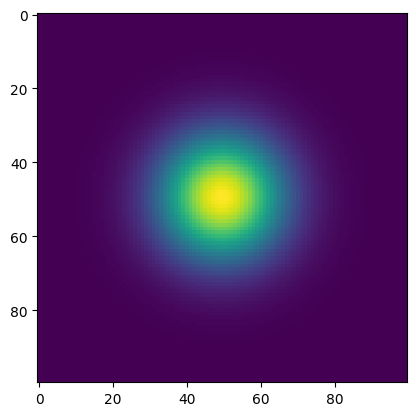

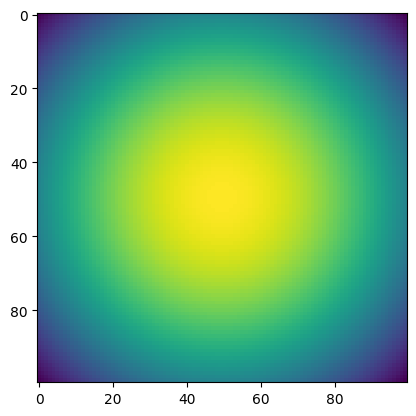

In [32]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
x, y = np.meshgrid(x, y)
state = []

for t in range (1, 1001):
    state.append(diffusionEQ(x, y, t))


for i in range(0,100,50):
    plt.imshow(state[i])
    plt.show()

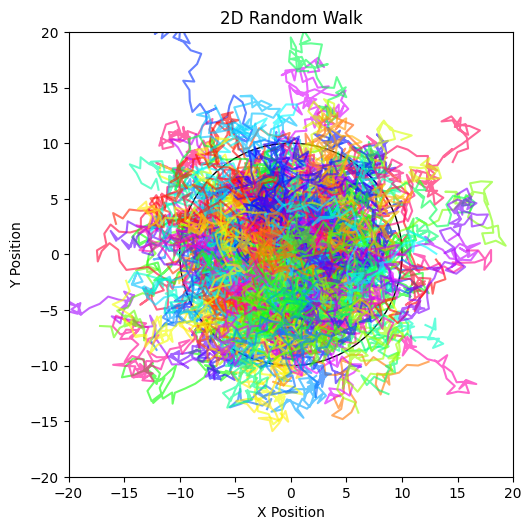

In [38]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
r = 1

def produce1randomWalker(N, r):
    random_angles = np.random.uniform(0, 2 * np.pi, N)

    x_values = r * np.cos(random_angles)
    y_values = r * np.sin(random_angles)

    steps_x = np.cumsum(x_values)
    steps_y = np.cumsum(y_values)

    steps_x[0] = 0
    steps_y[0] = 0
    return steps_x, steps_y

# Create subplots: 2 rows, 1 column
fig = plt.figure(figsize=(12, 10))  # Larger figure size for better visualization

# Top row: 2D random walk plot
ax1 = plt.subplot2grid((2, 1), (0, 0))  # Top row
avg_r = (np.average(r) + np.std(r)) * np.sqrt(N)
ax1.set_xlim(-2 * avg_r, 2 * avg_r)
ax1.set_ylim(-2 * avg_r, 2 * avg_r)

all_x = []
all_y = []
all_r = []
for i in range(2000):
    x, y = produce1randomWalker(N, r)
    if i%10 == 0 :
        ax1.plot(x, y, color=plt.cm.hsv(i * 20 % 255), alpha=0.6)
    all_x.append(x[-1])
    all_y.append(y[-1])
    all_r.append( np.sqrt(x[-1]**2 + y[-1]**2) )

ax1.set_aspect(1)
ax1.add_artist(plt.Circle((0, 0), avg_r, color='black', fill=False, alpha=1))
ax1.set_title("2D Random Walk")
ax1.set_xlabel("X Position")
ax1.set_ylabel("Y Position")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()